In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from collections import defaultdict
import folium
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

from library import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
cbre_metro = 'New York'
cbre = import_cbre(metro = cbre_metro)

# Zip Codes in Zillow metro area

zillow_metro = 'New York-Newark-Jersey City'
zillow = import_zillow(metro = zillow_metro)

# Zip Codes in CBRE

# zillow = import_zillow(zip_code=cbre.index)

In [5]:
zillow.State.unique()

array(['NY', 'NJ', 'PA'], dtype=object)

In [13]:
zip_centroid = import_centroid()

in_json = ['../data/ny_new_york_zip_codes_geo.min.json','../data/nj_new_jersey_zip_codes_geo.min.json',
              '../data/pa_pennsylvania_zip_codes_geo.min.json']
geojson = combine_geo(in_json)

coor = [40.730610, -73.935242]

In [14]:
zip_pop = import_pop()

### CBRE Map

In [15]:
get_stat(cbre,zip_pop)

,submktname,Population,Household_Count
Brunswick,19,16614.0,6347.5
Chelsea,12,26530.5,17082.5
City Hall,7,6988.0,3143.0
Clarkstown/ Orangetown,19,7085.0,2375.0
East I-287 Corridor,10,14389.5,5505.0
East Side,4,31924.0,23485.0
Eastern Monmouth,30,6313.0,2518.0
Fifth/Madison Avenue,5,3.0,0.0
Financial,29,5038.5,2670.0
Fishkill,28,6052.0,2433.5


In [16]:
cbre_centroid = get_centroid(cbre,zip_centroid)

In [17]:
cbre_le = preprocessing.LabelEncoder()
cbre_le.fit(cbre.submkt_id)

LabelEncoder()

In [18]:
cbre['submkt_id_label'] = cbre_le.transform(cbre.submkt_id)
cbre_map = make_map(geojson,coor,cbre.submkt_id.nunique(),
                    cbre['submkt_id_label'].reset_index(),centroid=cbre_centroid)

In [19]:
cbre_map.save('../fig/'+cbre_metro+'_cbre.html')

### Zillow Clustering

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

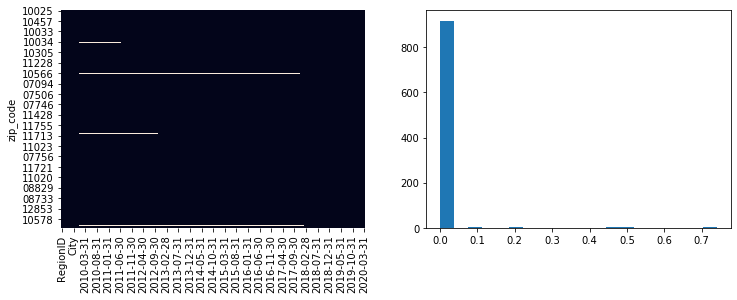

In [20]:
plot_missing(zillow)

In [21]:
zillow = zillow.dropna()

In [22]:
zillow_info,zillow_ts = split_zillow(zillow)
change = get_change(zillow_ts)

In [23]:
weight = 0
syn = get_syn(change,zip_centroid,weight)

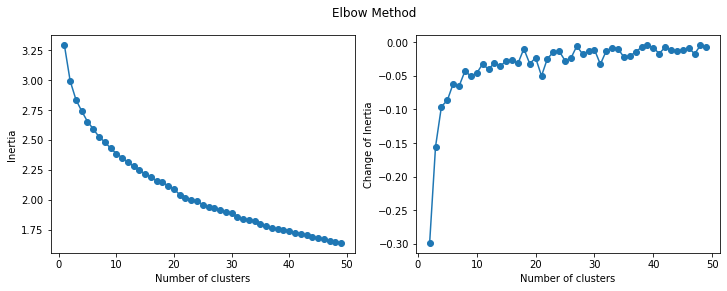

In [27]:
kmeans = KMeans(n_init=40, random_state=42)

plot_inertia(kmeans, syn, range(1, 50))

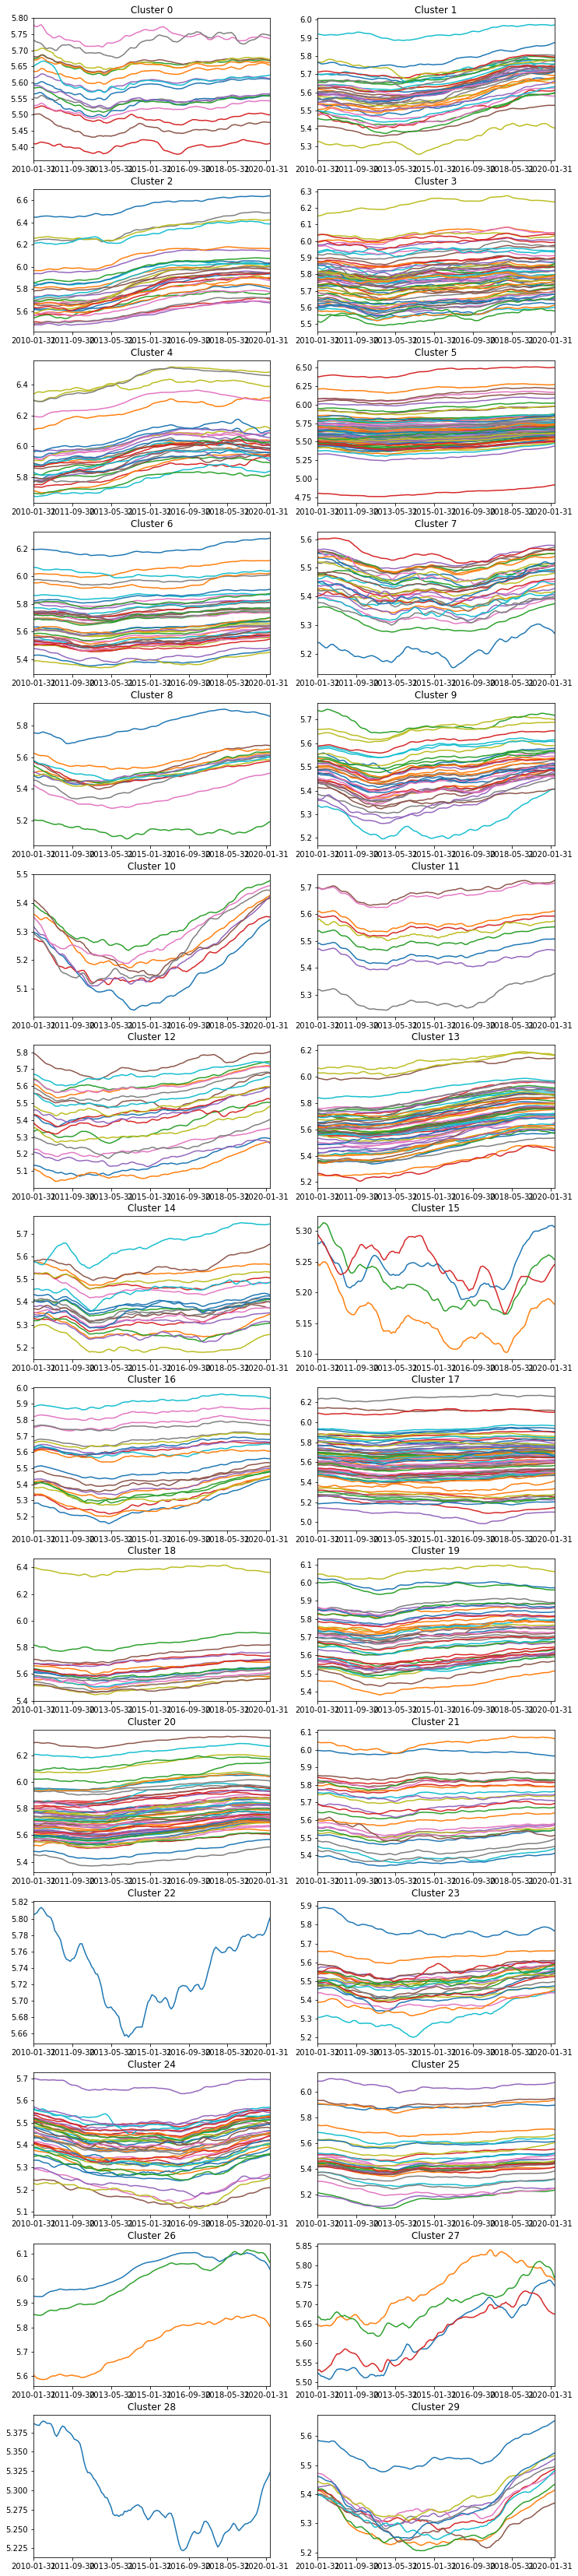

In [30]:
ncluster = 30
km_predict = fit_kmeans(ncluster, syn, kmeans)
plot_clusters(km_predict,zillow_ts)

In [29]:
geo_map = make_map(geojson,coor,ncluster,km_predict)
# geo_map
geo_map.save('../fig/'+cbre_metro+'_km_'+str(ncluster)+'.html')